**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


#Loading data
books = pd.read_csv("books/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [2]:

users = pd.read_csv('books/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [3]:
ratings = pd.read_csv('books/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

### Check no.of records and features given in each dataset

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Exploring books dataset

In [7]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [8]:
books = books.iloc[:,0:5]

In [9]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [10]:
books.yearOfPublication.value_counts()

2002         13903
2001         13715
1999         13414
2000         13373
1998         12116
2003         11610
1997         11494
1996         10687
1995         10259
1994          8857
1993          7920
1992          7390
1991          6926
1990          6394
1989          5825
1988          5545
1987          4761
2004          4629
1986          4258
1999          4017
1985          3912
2000          3859
2002          3724
1998          3650
2001          3644
1984          3631
0             3570
1997          3396
1996          3343
1983          3297
             ...  
1919             1
1931             1
2020             1
1806             1
1910             1
2011             1
1926             1
1930             1
2008             1
Gallimard        1
1908             1
2037             1
2012             1
1914             1
1924             1
1378             1
1927             1
1376             1
2024             1
1934             1
2038             1
2026        

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [11]:
books.loc[books['yearOfPublication'].isin(['DK Publishing Inc','Gallimard'])]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [12]:
#books.drop( books[books['yearOfPublication'].isin(['DK Publishing Inc','Gallimard'])], inplace = True)
books = books.drop([209538,220731,221678])

In [13]:
books.loc[books['yearOfPublication'].isin(['DK Publishing Inc','Gallimard'])]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


### Change the datatype of yearOfPublication to 'int'

In [14]:
books.dtypes


ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

In [15]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int32')

In [16]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [17]:
books.dropna(subset=['publisher'])

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner


## Exploring Users dataset

In [18]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [19]:
#users.Age.unique
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [20]:
users.Age=users.Age.where(users.Age.between(5,90))
#users.sample(50)

### Replace null values in column `Age` with mean

In [21]:
users['Age'].fillna((users['Age'].mean()), inplace=True)
#users.sample(50)

### Change the datatype of `Age` to `int`

In [22]:
users.dtypes

userID        int64
Location     object
Age         float64
dtype: object

In [23]:
users['Age'] = users['Age'].astype('int32')

In [24]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [25]:
ratings.shape

(1149780, 3)

In [26]:
n_users = users.shape[0]
n_books = books.shape[0]

In [27]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [28]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [29]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]
print (ratings.shape)
print (ratings_new.shape)

(1149780, 3)
(1031132, 3)


### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [30]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [31]:
ratings_explicit = ratings_new[ratings_new.bookRating != 0]
ratings_implicit = ratings_new[ratings_new.bookRating == 0]

### Find out which rating has been given highest number of times

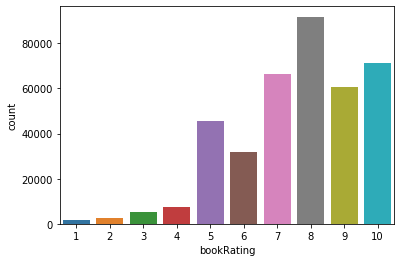

In [32]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt
sns.countplot(data=ratings_explicit , x='bookRating')
#plt.show()

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [33]:
counts1 = ratings_explicit['userID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >=100].index)]
counts = ratings_explicit['bookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts >=100].index)]
print(ratings_explicit.shape)
ratings_explicit.head()

(103271, 3)


,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [34]:
ratings_matrix = ratings_explicit.pivot(index ='userID', columns ='ISBN', values='bookRating')
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print (ratings_matrix.shape)
ratings_matrix.head()

(449, 66574)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
ratings_matrix.fillna(0, inplace=True)
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [36]:
#ratings_matrix.to_csv('ratings_matrix.csv') 

In [62]:
from surprise import Reader, Dataset
from scipy.sparse.linalg import svds

from surprise import accuracy

In [63]:
U, sigma, Vt = svds(ratings_matrix, k = 50)
sigma


array([147.92121923, 149.34383594, 150.07402888, 152.20117656,
       152.87418704, 154.61308372, 154.8009367 , 155.9576219 ,
       158.05647521, 159.21079485, 159.81671145, 162.01964856,
       162.77851803, 163.33054935, 166.02489424, 166.8162491 ,
       168.04973155, 170.7748546 , 171.01325758, 173.2942917 ,
       174.57625311, 176.65730369, 178.61914388, 180.29517228,
       182.25079073, 184.10707214, 187.61690418, 189.75277078,
       190.96974587, 195.14643816, 199.83137575, 201.70083342,
       202.18713995, 203.48701648, 207.26450247, 209.9298699 ,
       213.23599152, 216.88280902, 224.26954903, 231.66187407,
       235.67096044, 249.95821298, 252.02931103, 261.24819623,
       267.9821169 , 281.01208736, 293.69539697, 379.58353138,
       634.74439146, 680.41331629])

In [64]:
sigma = np.diag(sigma)
sigma

array([[147.92121923,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , 149.34383594,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        , 150.07402888, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 379.58353138,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
        634.74439146,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 680.41331629]])

In [65]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [66]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = ratings_matrix.columns)

In [67]:
preds_df

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025341,-0.002146,-1.430803e-03,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080027,0.004746,0.028314,0.000120,-0.001693,0.067503
1,-0.010012,-0.003669,-2.446294e-03,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2,-0.015054,-0.015457,-1.030440e-02,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
3,-0.021499,0.035602,2.373467e-02,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4,0.002077,-0.007965,-5.310030e-03,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673458,0.002591,-0.008229,0.001413,0.004918,0.047773
5,-0.002046,0.018614,1.240950e-02,0.018614,0.018614,0.007966,0.022983,-0.005167,-0.005167,0.018298,...,0.002278,0.003343,0.029729,-0.013429,-0.069757,0.008082,0.003330,0.001519,0.008519,0.072081
6,-0.015920,0.020221,1.348068e-02,0.020221,0.020221,0.014194,0.016776,-0.002339,-0.002339,0.031493,...,0.002596,0.003667,0.030025,0.012455,0.030068,0.013586,0.001308,0.001731,0.014216,-0.004550
7,-0.010875,-0.010051,-6.700599e-03,-0.010051,-0.010051,0.023373,-0.014173,0.017087,0.017087,0.057110,...,0.000141,0.006781,0.121680,-0.000650,-0.319178,0.018844,0.045594,0.000094,0.014902,0.012477
8,0.040930,-0.030352,-2.023461e-02,-0.030352,-0.030352,0.018473,-0.031587,-0.013278,-0.013278,0.037860,...,0.002069,0.005255,0.070450,0.007803,-0.077213,0.014357,0.005920,0.001380,0.016526,-0.027260
9,0.023473,-0.004168,-2.778342e-03,-0.004168,-0.004168,0.054426,-0.015698,-0.011736,-0.011736,0.114924,...,0.006618,0.012665,0.172246,-0.010903,-0.175555,0.049872,0.012847,0.004412,0.051858,-0.023768


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [47]:
userID = 2110

In [48]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [50]:
user_row_number = user_id - 1  #UserID starts at zero not 1
sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending = False)
sorted_user_predictions

ISBN
059035342X    0.682443
0345370775    0.368945
0345384911    0.333624
043935806X    0.333209
044021145X    0.329336
0451151259    0.313295
0439139597    0.305088
0439064872    0.290587
0380759497    0.278563
0345353145    0.250941
0451167317    0.249253
0439136369    0.242676
0618002235    0.239957
0880389117    0.239552
0618002227    0.239242
0451160525    0.234959
0446310786    0.231818
0451173317    0.229402
0440213525    0.228038
0060392452    0.227935
0439136350    0.226968
0345335287    0.223613
0441845630    0.221496
1560768304    0.221496
0451156609    0.221396
0451180232    0.221054
0345317580    0.219552
0451142934    0.218949
0312980140    0.218348
0670835382    0.216858
                ...   
0553576925   -0.042664
0688088686   -0.043207
0786000899   -0.043301
0553567683   -0.043553
042518630X   -0.043825
0671673661   -0.044025
0345361571   -0.044076
042517770X   -0.044668
0446603090   -0.044738
0684195984   -0.047424
0684195976   -0.047690
0679405283   -0.047838
055380

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [52]:
user_data = ratings[ratings.userID == (userID)]

In [53]:
user_data.head()

,userID,ISBN,bookRating
14447,2110,0060506989,0
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14451,2110,0140298479,0


In [54]:
user_data.shape

(163, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [55]:
user_full_info = user_data.merge(books, how = 'left', left_on = 'ISBN', right_on = 'ISBN').sort_values(['bookRating'], ascending = False)
print('User {0} has already rated {1} books.'.format(userID, user_full_info.dropna().shape[0]))
#print('Recommending the highest {0} predicted ratings for books not already rated.'.format(num_recommendations))

User 2110 has already rated 163 books.


In [56]:
books.shape

(271357, 5)

In [57]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [58]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
49,2110,0380570009,10,How to Talk So Kids Will Listen and Listen So ...,Adele Faber,1991,Back Bay Books
20,2110,0345375580,10,The Elf Queen of Shannara (Heritage of Shannar...,Terry Brooks,1993,Del Rey Books
89,2110,0590213040,10,The Andalite's Gift (Animorphs : Megamorphs 1),K. A. Applegate,1997,Scholastic
88,2110,0590109960,10,Watchers #1: Last Stop,Peter Lerangis,1998,Scholastic
87,2110,0590109715,10,"The Andalite Chronicles (Elfangor's Journey, A...",Katherine Applegate,1997,Apple


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [61]:
    recommendations = (books[~books['ISBN'].isin(user_full_info['ISBN'])].
                      merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                           left_on = 'ISBN',
                           right_on = 'ISBN').
                      rename(columns = {user_row_number: 'Predictions'}).
                      sort_values('Predictions', ascending = False).
                      iloc[:10, :-1])
    recommendations

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
1187,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
6168,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books
5443,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
453,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
2026,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
5368,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
3399,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
972,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
2429,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
6033,0451167317,The Dark Half,Stephen King,1994,Signet Book
